In [2]:
import matplotlib.pyplot as plt
import pickle, os, sys
from XANES2020_code import PKG_DATA
from XANES2020_code.general_tools import imagesc, load_object, save_object
from XANES2020_code.Betatron_analysis import xray_analysis as xray
from XANES2020_code.Betatron_analysis import XcomWebsiteServer as xcom

In [3]:
muPath = os.path.join(PKG_DATA,'betatron','xcom_muFiles')
rhoPath = os.path.join(PKG_DATA,'betatron','xcom_gpcc')

fRegions = xray.fRegions

cam_scint = fRegions(label=1,material ='CsI', d =150)

(0.0, 300.0)

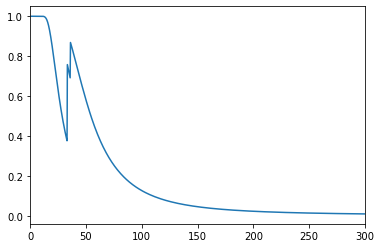

In [4]:
E_keV_lin = np.linspace(1,300,num=3000)
cam_scint.mu = xcom.loadMuFile(cam_scint.material,muPath,E_keV_lin*1e-3)
cam_scint.rho = xcom.getDensity(cam_scint.material,rhoPath)
cam_scint.calcT_E()

plt.plot(E_keV_lin,1-cam_scint.T_E)
plt.xlim([0,300])

In [7]:
andorQE_filepath = os.path.join(PKG_DATA,'betatron','cam_QEs/Gematron_QE_modelled.pkl')

andor_gematron_QE = {
    'E_keV': E_keV_lin,
    'QE':  1-cam_scint.T_E
}
save_object(andor_gematron_QE,andorQE_filepath)
